In [ ]:
import keras
print(keras.__version__)
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
drive.mount('/content/drive')

2.12.0
2.12.0
Mounted at /content/drive


In [ ]:
#Source: https://gist.github.com/carlosedp
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

tf.compat.v1.enable_eager_execution()

# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

# Prepare MNIST data.
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

# Create TF Model.
class NeuralNet(Model):
    # Set layers.
    def __init__(self):
        super(NeuralNet, self).__init__()
        # First fully-connected hidden layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
        # First fully-connected hidden layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
        # Second fully-connecter hidden layer.
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build neural network model.
neural_net = NeuralNet()

# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate)

# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = neural_net(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = neural_net.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

# Test model on validation set.
pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

11490434/11490434 [==============================] - 0s 0us/step
step: 100, loss: 0.346763, accuracy: 0.910156
step: 200, loss: 0.261013, accuracy: 0.929688
step: 300, loss: 0.297864, accuracy: 0.921875
step: 400, loss: 0.246461, accuracy: 0.917969
step: 500, loss: 0.176966, accuracy: 0.933594
step: 600, loss: 0.193147, accuracy: 0.941406
step: 700, loss: 0.193436, accuracy: 0.960938
step: 800, loss: 0.134226, accuracy: 0.960938
step: 900, loss: 0.159081, accuracy: 0.957031
step: 1000, loss: 0.100563, accuracy: 0.976562
step: 1100, loss: 0.117329, accuracy: 0.972656
step: 1200, loss: 0.081043, accuracy: 0.976562
step: 1300, loss: 0.119010, accuracy: 0.964844
step: 1400, loss: 0.069032, accuracy: 0.984375
step: 1500, loss: 0.100226, accuracy: 0.980469
step: 1600, loss: 0.083099, accuracy: 0.984375
step: 1700, loss: 0.083333, accuracy: 0.980469
step: 1800, loss: 0.138614, accuracy: 0.957031
step: 1900, loss: 0.078915, accuracy: 0.968750
step: 2000, loss: 0.134079, accuracy: 0.968750
Test

In [ ]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1) 10
Accuracy: 0.984
1/1 [==============================] - 0s 180ms/step
Predicted: class=5


In [ ]:
# https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
# if the sequence : 
# , 2, 3, 4, 5, 6, 7, 8, 9, 10 
#lstm for time series forecasting
#Input Output
#1, 2, 3, 4, 5 6
#2, 3, 4, 5, 6 7
#3, 4, 5, 6, 7 8
#This problem involves predicting the number of car sales per month
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)
# retrieve the values
values = df.values.astype('float32')
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)
# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=2, validation_data=(X_test, y_test))
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

<ipython-input-4-bdb3f9465e1f>:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = read_csv(path, header=0, index_col=0, squeeze=True)


(91, 5, 1) (12, 5, 1) (91,) (12,)
Epoch 1/350
3/3 - 2s - loss: 408808000.0000 - mae: 17424.3848 - val_loss: 30622512.0000 - val_mae: 4914.7178 - 2s/epoch - 530ms/step
Epoch 2/350
3/3 - 0s - loss: 37341292.0000 - mae: 5075.5942 - val_loss: 173634864.0000 - val_mae: 12725.6982 - 46ms/epoch - 15ms/step
Epoch 3/350
3/3 - 0s - loss: 140103376.0000 - mae: 11215.6250 - val_loss: 150633488.0000 - val_mae: 11872.7920 - 71ms/epoch - 24ms/step
Epoch 4/350
3/3 - 0s - loss: 77592944.0000 - mae: 8066.3833 - val_loss: 32834992.0000 - val_mae: 4766.3418 - 48ms/epoch - 16ms/step
Epoch 5/350
3/3 - 0s - loss: 22817354.0000 - mae: 3791.6807 - val_loss: 31211146.0000 - val_mae: 4846.3433 - 47ms/epoch - 16ms/step
Epoch 6/350
3/3 - 0s - loss: 41010352.0000 - mae: 5101.3931 - val_loss: 86516632.0000 - val_mae: 8035.5098 - 53ms/epoch - 18ms/step
Epoch 7/350
3/3 - 0s - loss: 58641260.0000 - mae: 6322.6719 - val_loss: 52767796.0000 - val_mae: 6200.2554 - 53ms/epoch - 18ms/step
Epoch 8/350
3/3 - 0s - loss: 311935

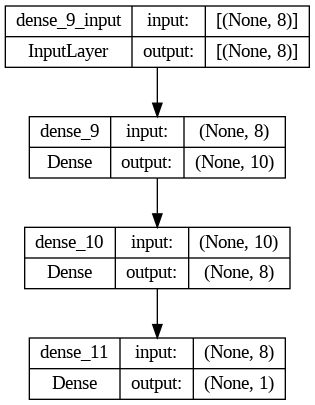

In [ ]:
# example of plotting a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
plot_model(model, 'model.png', show_shapes=True)

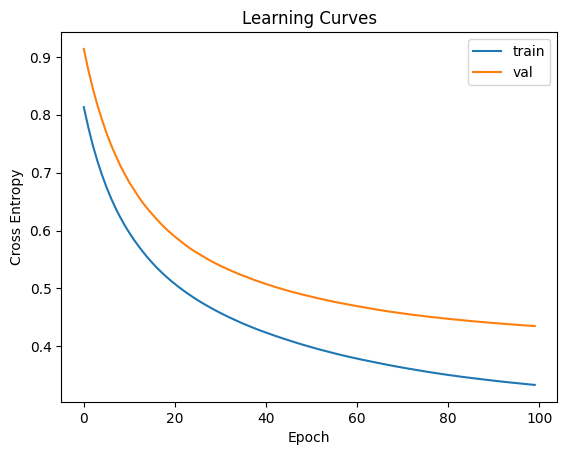

In [ ]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

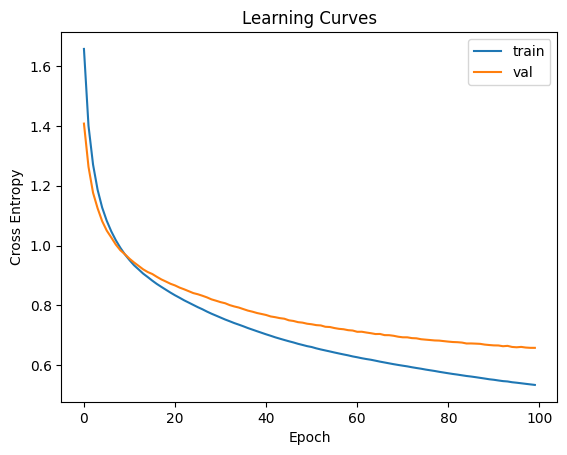

In [ ]:
# Class activity 1
from sklearn.preprocessing import OneHotEncoder
X, y = make_classification(n_samples=1000, n_classes=3, random_state=1, n_informative=5)

ohc = OneHotEncoder(sparse_output=False)
y = ohc.fit_transform(y.reshape(-1, 1))

# determine the number of input features
n_features = X.shape[1]


# define model
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(3, activation='softmax'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='categorical_crossentropy')
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

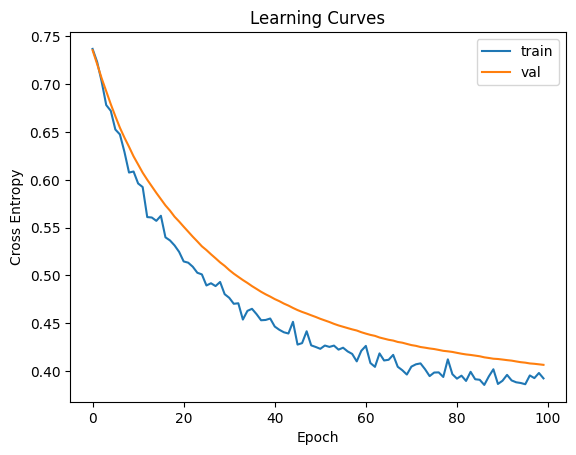

In [ ]:
# class activity 2 - batch normalization
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(Conv2D(10, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
model.summary()
print(in_shape)
x_train.shape


(28, 28, 1) 10
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 10)        2890      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1440)              0         
                                                                 
 dense_45 (Dense)            (None, 128)               184448    
                                                                 
 dense_46 (Dense)            (None, 256)               33024     
                                      

(60000, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(10, (3,3), strides=(1,1), activation='relu', kernel_initializer='he_uniform', input_shape=(39, 39, 1)))
model.add(Conv2D(10, (3,3), strides=(1,1), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(10, (3,3), strides=(2,2), activation='relu', kernel_initializer='he_uniform'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
model.summary()
print(in_shape)
x_train.shape

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 37, 37, 10)        100       
                                                                 
 conv2d_18 (Conv2D)          (None, 35, 35, 10)        910       
                                                                 
 conv2d_19 (Conv2D)          (None, 17, 17, 10)        910       
                                                                 
 flatten_9 (Flatten)         (None, 2890)              0         
                                                                 
 dense_57 (Dense)            (None, 128)               370048    
                                                                 
 dense_58 (Dense)            (None, 256)               33024     
                                                                 
 dropout_9 (Dropout)         (None, 256)             

(60000, 28, 28, 1)

In [ ]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshape data to have a single channel
#x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
#x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
#in_shape = x_train.shape[1:]

In [ ]:
x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)).shape

(60000, 28, 28, 1)